In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

lengths = np.array([195, 182])
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['font.size'] =20

### 1.1 Likelihood function


In [10]:
mu = np.linspace(150,250)
sigma = np.linspace(0,15)[::-1]

mm, ss = np.meshgrid(mu,sigma)

In [59]:
likelihood = stats.norm(mm,ss).pdf(lengths[0])* stats.norm(mm, ss).pdf(lengths[1])

In [60]:
aspect = mm.max() / ss.max() / 3    # 가로 세로 스케일의 비율
extent = [mm.min(), mm.max(), ss.min(), ss.max()]

Text(0, 0.5, '$\\sigma$')

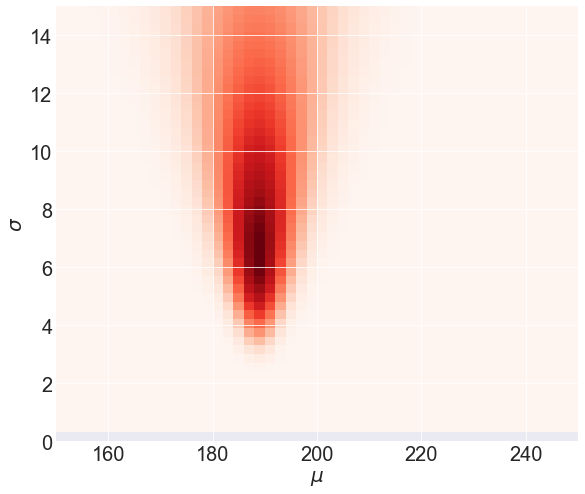

In [61]:
plt.imshow(likelihood, cmap='Reds',aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

likelihood 함수는 가장 관측치를 잘 만들어내는 모수들의 조합을 보여준다. likelihood함수로만 모수에대해 추론한다면 위 그림에서 가장 짙은 빨간점의 지점을 $\mu, \sigma$의 값으로 선택할것이다. 

### 1.2 prior distribution
likelihood 함수외에 prior 사전 분포는 베이즈룰에 포함되는 핵심 요소이다. 추론의 과정에 우리의 사전정보를 포함시킬 수 있다. 나는 모수 $\mu$에 대해서 다음과 같은 사전정보를 가지고 있다. <br>

$$
\mu \sim N(200,15^2) \\
\sigma \sim Cauchy(0,10^2)
$$


Text(0, 0.5, '$\\sigma$')

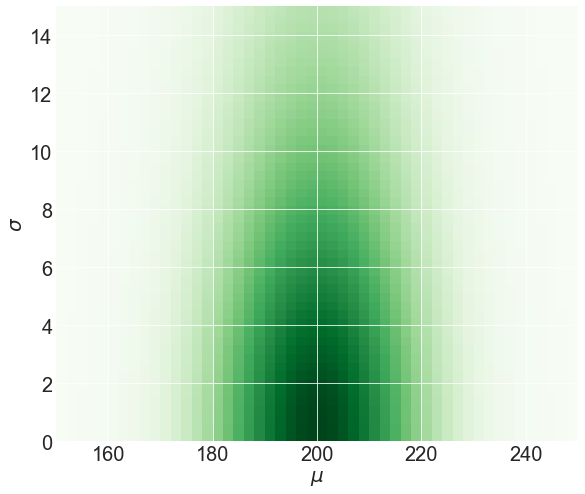

In [47]:
prior = stats.norm(200, 15).pdf(mm) * stats.cauchy(0, 10).pdf(ss)

plt.imshow(prior, cmap='Greens', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

### 1.3 Posterior distibution

Text(0, 0.5, '$\\sigma$')

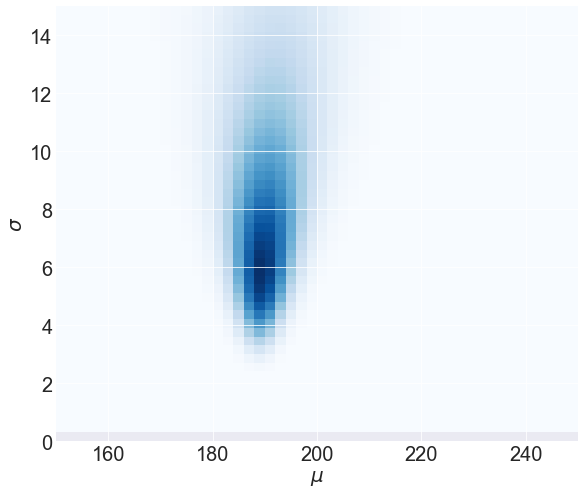

In [48]:
unnormalized_posterior = prior * likelihood
posterior = unnormalized_posterior / np.nan_to_num(unnormalized_posterior).sum()
plt.imshow(posterior, cmap='Blues', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')